# Where's Kuleshov?

<img src="https://www.skoltech.ru/app/data/uploads/2017/09/DSC3968.jpg" width="500">

#### In this final exam, you are on a quest to find a photo of Alexander Kuleshov hidden in the files! In order to do this, you will have to follow a series of clues below.

# Step 1

The first clue is a stack of photos of the QR code. Unfortunately, the camera did not allow to put the whole QR-code in focus, but only some parts of it. You have to do focus stacking to recover the whole QR code and move on to finding Alexander Kuleshov!

In [ ]:
# Install zbar for qr code decoding [NOT REQUIRED]
!apt install zbar-tools
# Download archive with images from https://drive.google.com/file/d/1RF9Sqo9ojXTeDRyfkHVixNSUa0bAJQlo/view?usp=sharing and unzip it
!gdown --id 1RF9Sqo9ojXTeDRyfkHVixNSUa0bAJQlo
!unzip qr_focus.zip

In [ ]:
! pip install bitarray

In [3]:
import os
import cv2
import numpy as np
import pylab as plt

from bitarray import bitarray
from bitarray.util import ba2int
from skimage import restoration

In [4]:
# Load images
image_list = []
dir_path = 'qr_focus'
for fname in sorted(os.listdir(dir_path)):
    if fname.endswith('.jpg'):
        file_path = os.path.join(dir_path, fname)
        img = cv2.imread(file_path)
        image_list.append(img)

In [5]:
image_list[0].dtype

dtype('uint8')

In [6]:
from matplotlib.pylab import uint8
def focus_stacking(img_ls):
    # Insert your code here

    img_shape = img_ls[0]
    x, y, z = img_shape.shape
    stacked_image = np.zeros((x, y, z), uint8)

    for i in range(len(img_ls)):
        stacked_image += img_ls[i] // len(img_ls)
    return stacked_image

stacked_image = focus_stacking(image_list)

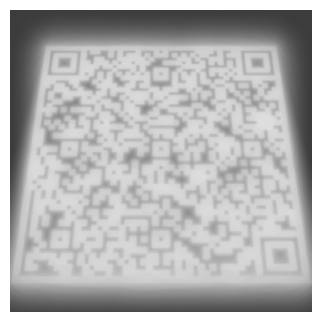

True

In [7]:
plt.figure(dpi=100)
plt.imshow(stacked_image, cmap=plt.cm.gray)
plt.axis(False)
plt.show()
# Make sure that stacked_image is uint8 type!
cv2.imwrite('stacked_qr.png', stacked_image)

You can already try to read a QR code with your phone (for example Google Lens), but you may also do a perspective transform if there are any problems with reading the QR code.

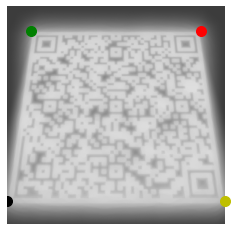

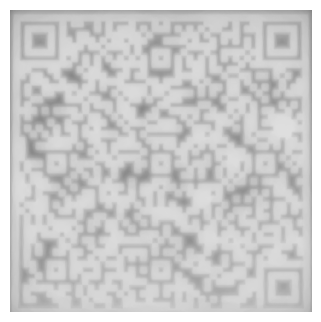

True

In [9]:
img = cv2.imread('stacked_qr.png')

pt1 = np.float32([
    [120, 120], [960, 120],
    [0, 965], [1080, 965]
])

pt2 = np.float32([
    [0, 0], [1080, 0],
    [0, 1080], [1080, 1080]
])

plt.imshow(img, cmap=plt.cm.gray)
plt.scatter(pt1[0][0], pt1[0][1], c='g', s=100)
plt.scatter(pt1[1][0], pt1[1][1], c='r', s=100)
plt.scatter(pt1[2][0], pt1[2][1], c='k', s=100)
plt.scatter(pt1[3][0], pt1[3][1], c='y', s=100)
plt.axis(False)
plt.show()

matrix = cv2.getPerspectiveTransform(pt1, pt2)
rimg = cv2.warpPerspective(img, matrix, (1080, 1080))

plt.figure(dpi=100)
plt.imshow(rimg, cmap=plt.cm.gray)
plt.axis(False)
plt.show()

cv2.imwrite('perspective_stacked_qr.png', rimg)

In [10]:
# Decode QR code and download file from link in qr code (you can do it manually)
!zbarimg -q perspective_stacked_qr.png

QR-Code:https://drive.google.com/file/d/1DCCHBIZH0U5vRaWRPQgX8rKKZ6Zl6BYb/view?usp=sharing


In [11]:
!gdown --id 1DCCHBIZH0U5vRaWRPQgX8rKKZ6Zl6BYb

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DCCHBIZH0U5vRaWRPQgX8rKKZ6Zl6BYb
To: /content/CI2022.png
100% 915k/915k [00:00<00:00, 122MB/s]


# Step 2

It is obvious to start looking for Skoltech President Alexander Kuleshov on Skoltech campus. And he is literally inside the campus image.

He is hidden in the image itself in every least significant bit of every pixel! The least significant bit algorithm is one of the methods for steganography, which allows you to hide any information in photo/audio data by slightly modifying the original data.

In this step you need to extract a hidden .jpg file from the image recovered in Step 1 using the least significant bit algorithm:

— read the given image and get the least significant bit for each pixel for each color channel

— group the resulting sequence of bits into a sequence of bytes (i.e. a sequence of words of 8 bits)

— write the resulting byte sequence into a file

In [13]:
import numpy as np
import pylab as plt
import cv2
from tqdm import tqdm
from typing import List


def byte2decimal(bits: List[int]):
    """
    Convert from binary representation to decimal

    For example:

    00000001 -> 1

    11111111 -> 255
    
    Parameters:
    bits (list): List of integers
    Returns:
    int: Decimal value
    """
    decimal_value = 0
    lsb_list = bitarray()
    
    for i, b in enumerate(bits):
        # Insert your code here
        bit_data = int(b)
        lsb_list.append(bit_data)

    decimal_value = ba2int(lsb_list)

    return decimal_value

In [14]:
# Sanity check
assert byte2decimal([1,1,1,1,1,1,1,1]) == 255
assert byte2decimal([0,0,0,0,0,0,0,1]) == 1

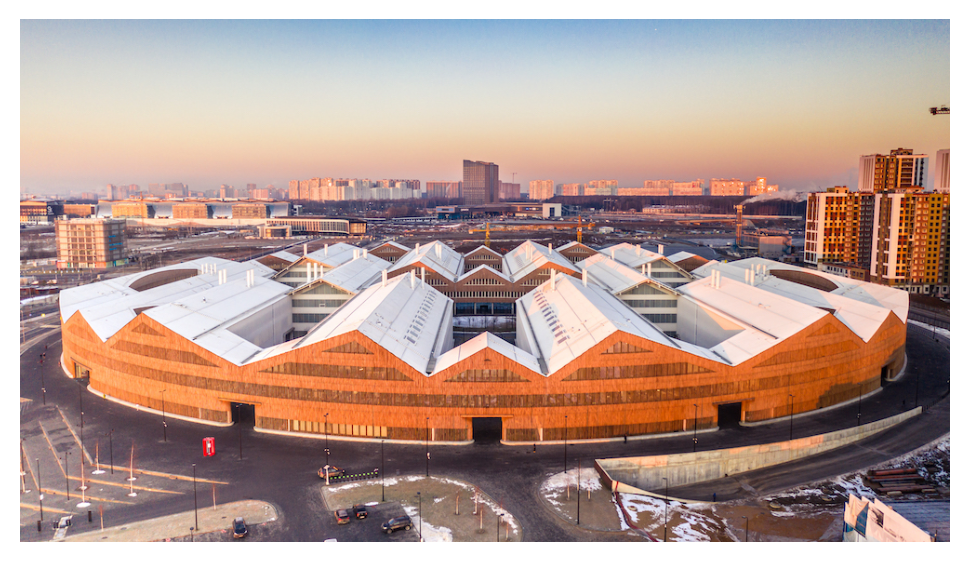

In [18]:
file_name = 'CI2022.png'
img = cv2.imread(file_name)[:, :, ::-1]
plt.figure(dpi=200)
plt.imshow(img)
plt.axis(False)
plt.show()

In [19]:
img.shape

(562, 1000, 3)

In [20]:
# 1. read the given image and get the least significant bit for each pixel for each color channel

bit_sequence = []
# For each pixel
for i in tqdm(range(img.shape[0])):
    for j in range(img.shape[1]):
        # For each color channel
        for c in range(3):
            pixel_value = img[i, j, c]
            
            least_significant_bit = int(bin(pixel_value)[-1])

            bit_sequence.append(least_significant_bit)

100%|██████████| 562/562 [00:01<00:00, 335.62it/s]


In [21]:
len(bit_sequence)/8

210750.0

In [26]:
# 2. group the resulting sequence of bits into a sequence of bytes (i.e. a sequence of words of 8 bits)

temp = []
byte_sequence = []

for i in range(len(bit_sequence)):

    bit_data = bit_sequence[i]
    temp.append(bit_data)

    if len(temp) == 8:
        byte_sequence.append(temp)
        temp = []


In [27]:
# 3. write the resulting byte sequence into a file

# Here we use standart python bytes() method, which convert string of integers (in range 0-255) into binary string
decimal_sequence = [byte2decimal(byte) for byte in byte_sequence]
with open('result.jpg', mode='wb') as f:
    f.write(bytes(decimal_sequence))

(400, 995, 3)


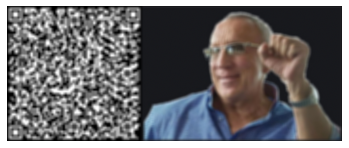

In [28]:
img = cv2.imread('result.jpg')[:, :, ::-1] / 255.
print(img.shape)
plt.imshow(img)
plt.axis(False)
plt.show()

# Step 3

If you have succeeded in deciphering the hidden file, you must have found Alexander Kuleshov. However, there seems to be some other message in the last image! Try to process this image so that you can read the QR code

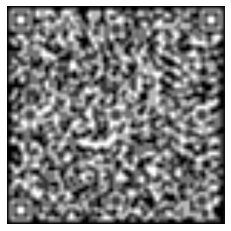

In [29]:
# Insert your code here

img_res = img[0:400, 0:400, 0]
plt.imshow(img_res, cmap = 'gray')
plt.axis(False)

plt.savefig('last_qr.png')

plt.show()

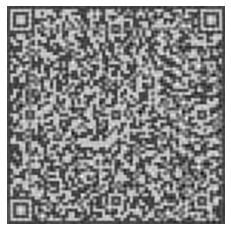

In [30]:
psf = np.ones((11, 11))
qr_deconvolved = restoration.wiener(img_res, psf, 100)
plt.imshow(qr_deconvolved, cmap = 'gray')
plt.axis(False)

plt.savefig('final_qr.png')

plt.show()

In [31]:
!zbarimg -q final_qr.png

After read qr-code manually, I got the message

Congratulations! You finally found Alexander Kuleshov and successfully passed the final exam! To receive a 100% grade, you must upload a photo of your student ID to Canvas.


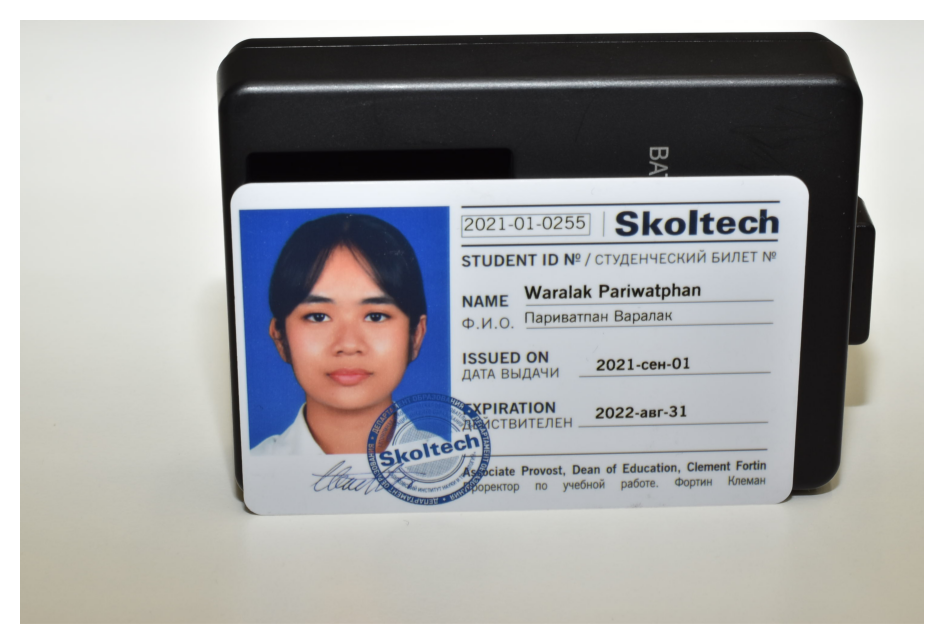

In [33]:
file_name = 'StudentID.JPG'
img = cv2.imread(file_name)[:, :, ::-1]
plt.figure(dpi=200)
plt.imshow(img)
plt.axis(False)
plt.show()